# Extract EDF files from the Jazz dataset


In [3]:
import pyedflib

# Specify the path to the EDF file
edf_file_path = "Z:\.Homeworks\Homework is a god 3\EGBI340 Signal & Systems\Jazz_Pilot\Jazz_Pilot\peachiaa_jazz_pilot\peachiaa_jazz_pilot 02.001.01 AGE 41  EO.edf"

# Open the EDF file
edf_file = pyedflib.EdfReader(edf_file_path)

# Get the number of signals in the EDF file
num_signals = edf_file.signals_in_file

# Get the signal labels
signal_labels = edf_file.getSignalLabels()

# Get the sample rates of each signal
sample_rates = edf_file.getSampleFrequencies()

# Get the number of samples in each signal
num_samples = edf_file.getNSamples()

# Get the data from the EDF file
data = []
for i in range(num_signals):
    signal_data = edf_file.readSignal(i)
    data.append(signal_data)

# Print the data
# for i in range(num_signals):
#     print(f"Signal {i+1} data:")
#     print(data[i])
#     print()


# Close the EDF file
edf_file.close()

# Print the necessary parameters
# for i in range(num_signals):
#     print(f"Signal {i+1}:")
#     print(f"  Label: {signal_labels[i]}")
#     print(f"  Sample Rate: {sample_rates[i]}")
#     print(f"  Number of Samples: {num_samples[i]}")
#     print()

print("Number of channels:", num_signals)
print("Sampling rate:", sample_rates[0])
print("Number of samples:", num_samples[0])
print("total time:", num_samples[0]/sample_rates[0])
print("Channel name:")
for i in range(num_signals):
    print(i, signal_labels[i])



Number of channels: 21
Sampling rate: 256.0
Number of samples: 598272
total time: 2337.0
Channel name:
0 EEG Fp1-LE
1 EEG F3-LE
2 EEG C3-LE
3 EEG P3-LE
4 EEG O1-LE
5 EEG F7-LE
6 EEG T3-LE
7 EEG T5-LE
8 EEG Fz-LE
9 EEG Fp2-LE
10 EEG F4-LE
11 EEG C4-LE
12 EEG P4-LE
13 EEG O2-LE
14 EEG F8-LE
15 EEG T4-LE
16 EEG T6-LE
17 EEG Cz-LE
18 EEG Pz-LE
19 EEG A2-A1
20 EEG 23A-23R


# Plotting raw data from the Jazz dataset

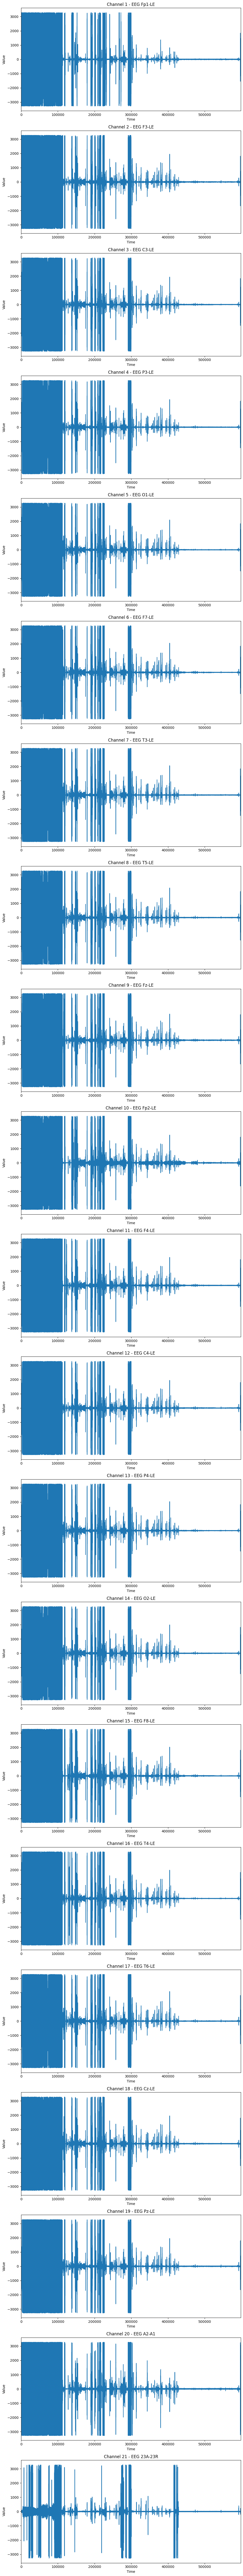

In [4]:
import matplotlib.pyplot as plt

# Assuming you have extracted the data into a variable called 'extracted_data'

# Create subplots for every channel
fig, axs = plt.subplots(num_signals, 1, figsize=(10, 5*num_signals))

# Iterate over each channel and plot the data
for i in range(num_signals):
    axs[i].plot(data[i])
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'Channel {i+1} - {signal_labels[i]}')
    axs[i].set_xlim(0, num_samples[i])  # Adjust the length of the X-axis

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Removing noises from the raw data

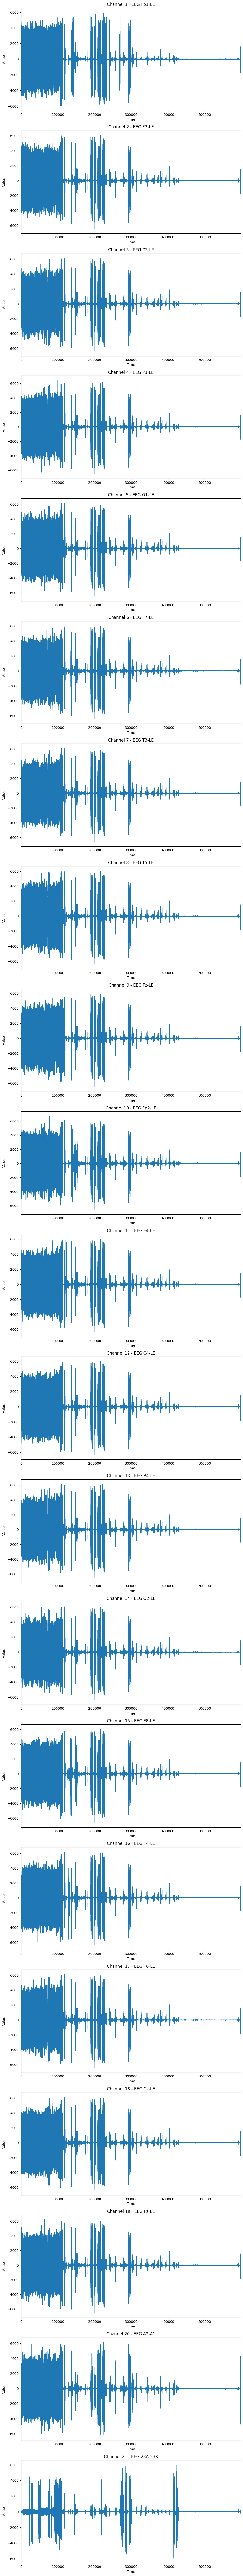

In [5]:
from scipy import signal

# Define the bandpass filter parameters
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 80  # Upper cutoff frequency in Hz
fs = sample_rates[0]  # Sampling rate in Hz

# Apply the bandpass filter to each channel's data
filtered_data = []
for i in range(num_signals):
    channel_data = data[i]
    sos = signal.butter(4, [lowcut, highcut], btype='band', fs=fs, output='sos')
    filtered_channel_data = signal.sosfilt(sos, channel_data)
    
    # Apply a notch filter to remove power line noise at 50 Hz
    notch_freq = 50  # Power line frequency in Hz
    q_factor = 30  # Quality factor
    b, a = signal.iirnotch(notch_freq, q_factor, fs)
    filtered_channel_data = signal.lfilter(b, a, filtered_channel_data)
    
    filtered_data.append(filtered_channel_data)

# Plot the filtered data
fig, axs = plt.subplots(num_signals, 1, figsize=(10, 5*num_signals))
for i in range(num_signals):
    axs[i].plot(filtered_data[i])
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'Channel {i+1} - {signal_labels[i]}')
    axs[i].set_xlim(0, num_samples[i])
plt.tight_layout()
plt.show()


# Plot spectrogram of the raw data

At 256 sampling rate 
Improvised: 260 to 292 seconds
Sample number: 260*256 to 292*256 = 66560 to 74752
Control: 296 to 328 seconds
Sample number: 296*256 to 328*256 = 75776 to 83968

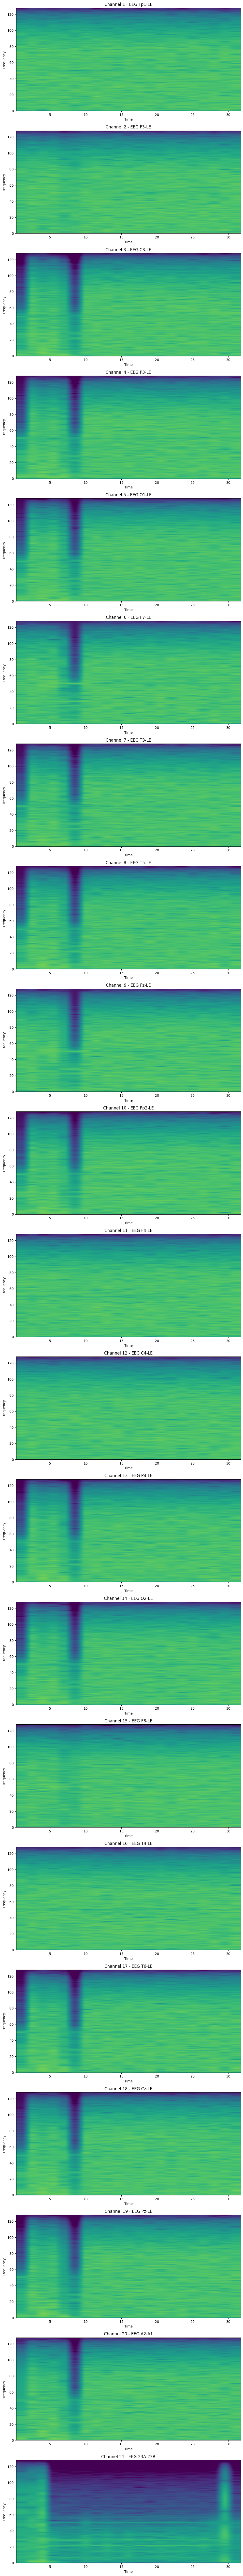

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Color scale for the spectrogram
color_scale = 100  # Increase this to make the spectrogram brighter

# range_start = 66560
# range_end = 74752

range_start = 75776 
range_end = 83968

# Assuming you have the filtered data in a variable called 'filtered_data'

# Create subplots for every channel
fig, axs = plt.subplots(num_signals, 1, figsize=(10, 5*num_signals))

# Iterate over each channel and plot the spectrogram
for i in range(num_signals):
    axs[i].specgram(filtered_data[i][range_start:range_end], Fs=sample_rates[i], vmin=-color_scale, vmax=color_scale, NFFT = 512)  # Increase the nfft value here
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Channel {i+1} - {signal_labels[i]}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Plot spectrogram of the filtered data of a single channel (Fp1 and Fp2) Compared between improvised and control

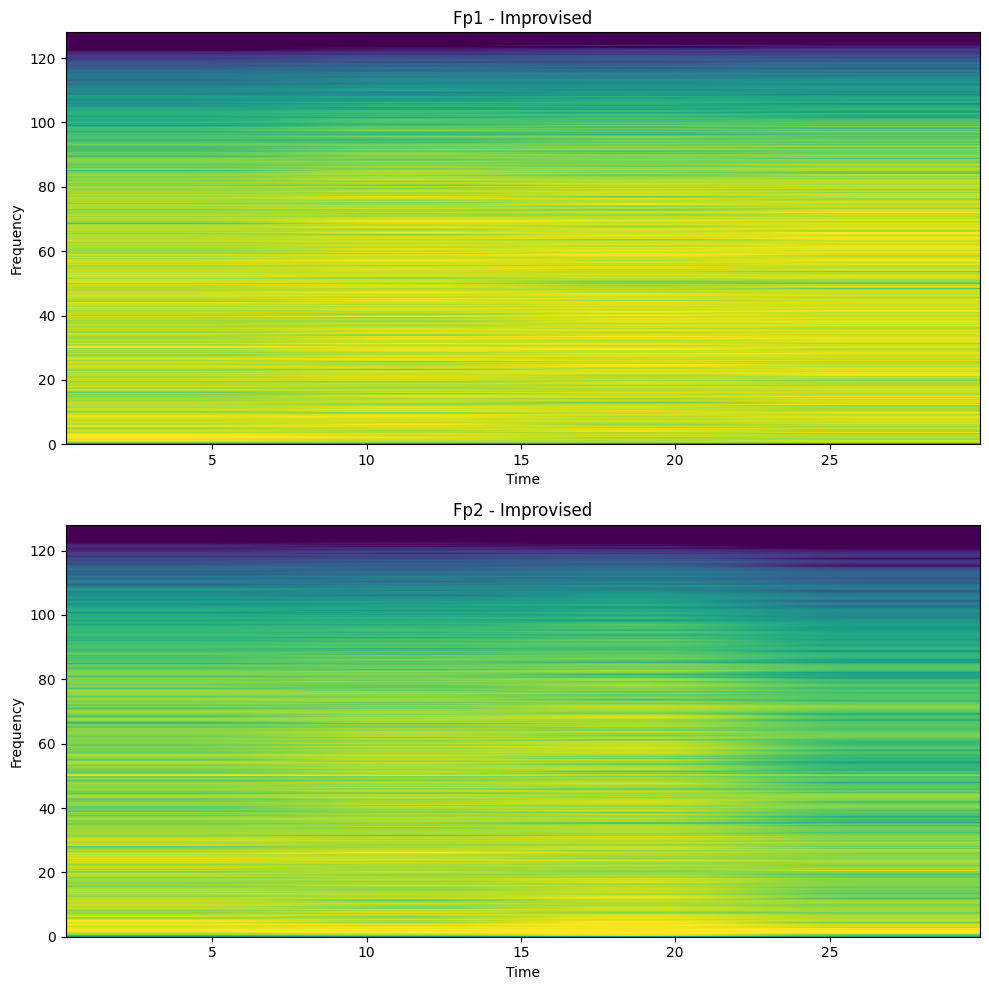

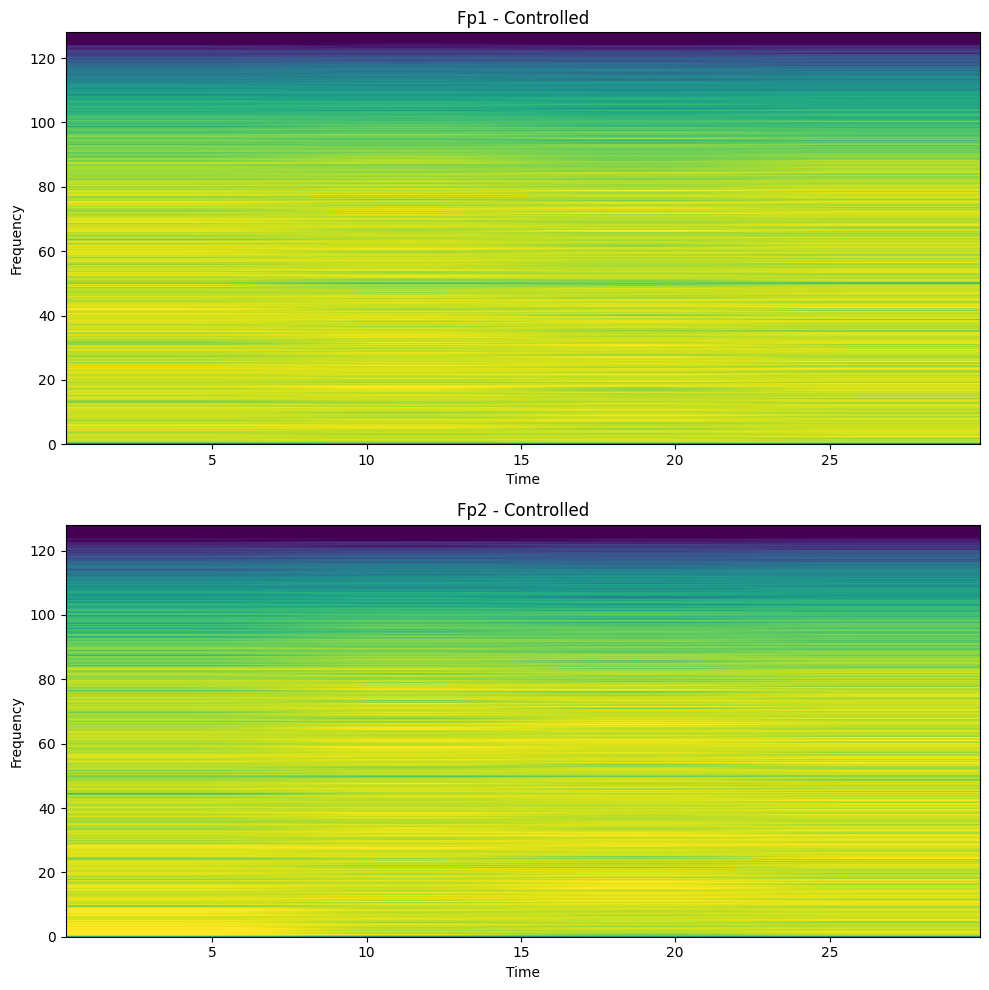

In [15]:
import matplotlib.pyplot as plt

color_scale = 50  # Increase this to make the spectrogram brighter
nfft = 2024  # Increase this to increase the frequency resolution

# Define the range for the improvised and controlled data
improvised_range_start = 66560
improvised_range_end = 74752
controlled_range_start = 75776
controlled_range_end = 83968

# Create subplots for Fp1 and Fp2
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the spectrogram for Fp1 in the improvised data
axs[0].specgram(filtered_data[0][improvised_range_start:improvised_range_end], Fs=sample_rates[0], vmin=-color_scale, vmax=color_scale, NFFT=nfft)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Fp1 - Improvised')

# Plot the spectrogram for Fp2 in the improvised data
axs[1].specgram(filtered_data[9][improvised_range_start:improvised_range_end], Fs=sample_rates[1], vmin=-color_scale, vmax=color_scale, NFFT=nfft)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Fp2 - Improvised')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots for Fp1 and Fp2
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the spectrogram for Fp1 in the controlled data
axs[0].specgram(filtered_data[0][controlled_range_start:controlled_range_end], Fs=sample_rates[0], vmin=-color_scale, vmax=color_scale, NFFT=nfft)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Fp1 - Controlled')

# Plot the spectrogram for Fp2 in the controlled data
axs[1].specgram(filtered_data[9][controlled_range_start:controlled_range_end], Fs=sample_rates[1], vmin=-color_scale, vmax=color_scale, NFFT=nfft)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Fp2 - Controlled')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Plot a FFT of the filtered data only in the wanted range
This set of code is used to plot the FFT of the filtered data only in the wanted range. The wanted range is defined by the user. The user can choose the range of the FFT by changing the value of the variable "range_start" and "range_end". The FFT will be plotted in the range of the frequency from "range_start" to "range_end" Hz.

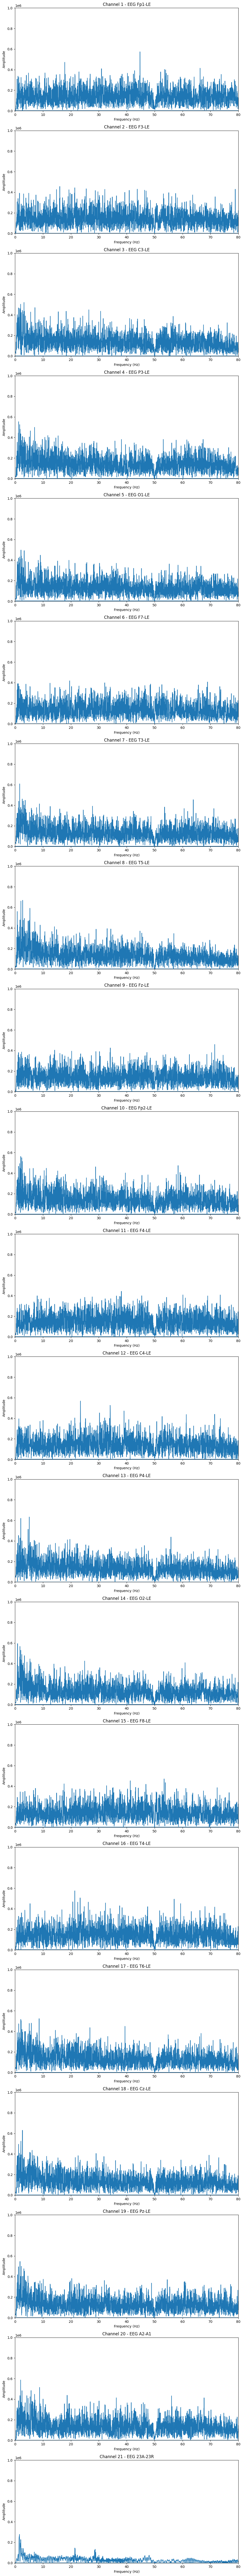

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the filtered data in a variable called 'filtered_data'

# Define the range of the FFT
# range_start = 66560
# range_end = 74752

range_start = 75776
range_end = 83968

# Apply the FFT to each channel's data in the desired range
fft_data = []
for i in range(num_signals):
    channel_data = filtered_data[i][range_start:range_end]
    fft_channel_data = np.fft.fft(channel_data)
    fft_data.append(fft_channel_data)

# Plot the FFT data
fig, axs = plt.subplots(num_signals, 1, figsize=(10, 5*num_signals))
for i in range(num_signals):
    freq = np.fft.fftfreq(range_end - range_start, 1/sample_rates[i])
    axs[i].plot(freq, np.abs(fft_data[i]))
    axs[i].set_xlabel('Frequency (Hz)')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title(f'Channel {i+1} - {signal_labels[i]}')
    axs[i].set_xlim(0, 80)  # Adjust the length of the X-axis
    axs[i].set_ylim(0, 1e6)  # Adjust the length of the Y-axis
    
plt.tight_layout()
plt.show()


# Plot a Power Spectral Density of the filtered data only in the wanted range

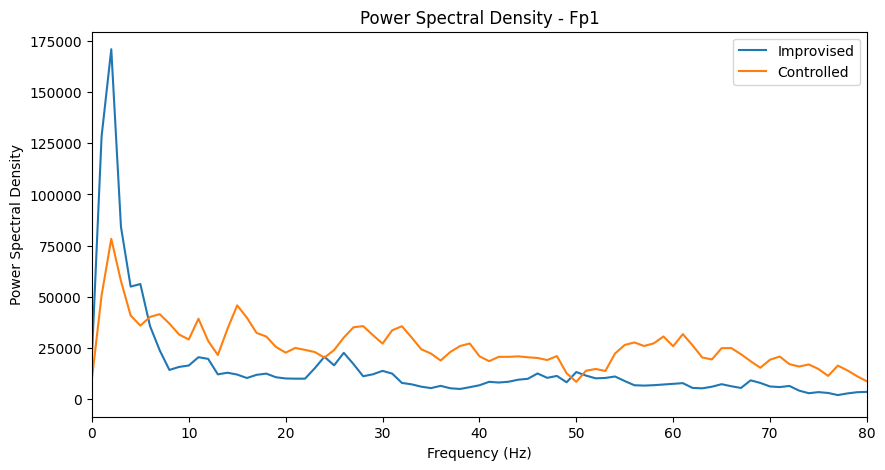

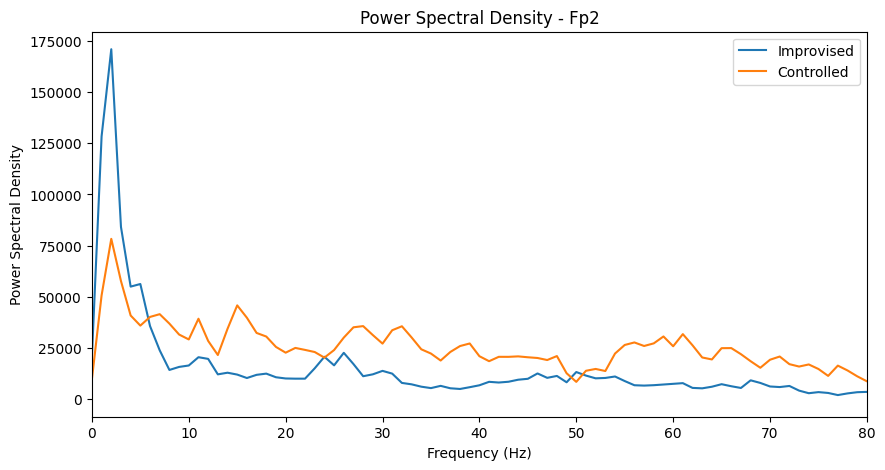

In [16]:
from scipy import signal
import matplotlib.pyplot as plt

# Define the range for the improvised and controlled data
improvised_range_start = 66560
improvised_range_end = 74752
controlled_range_start = 75776
controlled_range_end = 83968

# Define the parameters for the PSD calculation
nperseg = 256  # Number of samples per segment
noverlap = nperseg // 2  # Number of overlapping samples

# Calculate the PSD for the Fp1 channel in the improvised data
f_improvised, psd_improvised = signal.welch(filtered_data[0][improvised_range_start:improvised_range_end], fs=sample_rates[0], nperseg=nperseg, noverlap=noverlap)

# Calculate the PSD for the Fp2 channel in the improvised data
f_improvised, psd_improvised = signal.welch(filtered_data[9][improvised_range_start:improvised_range_end], fs=sample_rates[1], nperseg=nperseg, noverlap=noverlap)

# Calculate the PSD for the Fp1 channel in the controlled data
f_controlled, psd_controlled = signal.welch(filtered_data[0][controlled_range_start:controlled_range_end], fs=sample_rates[0], nperseg=nperseg, noverlap=noverlap)

# Calculate the PSD for the Fp2 channel in the controlled data
f_controlled, psd_controlled = signal.welch(filtered_data[9][controlled_range_start:controlled_range_end], fs=sample_rates[1], nperseg=nperseg, noverlap=noverlap)

# Plot the PSD for the Fp1 channel in the improvised and controlled data
plt.figure(figsize=(10, 5))
plt.plot(f_improvised, psd_improvised, label='Improvised')
plt.plot(f_controlled, psd_controlled, label='Controlled')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density - Fp1')
plt.xlim(0, 80)
plt.legend()
plt.show()

# Plot the PSD for the Fp2 channel in the improvised and controlled data
plt.figure(figsize=(10, 5))
plt.plot(f_improvised, psd_improvised, label='Improvised')
plt.plot(f_controlled, psd_controlled, label='Controlled')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density - Fp2')
plt.xlim(0, 80)
plt.legend()
plt.show()


# Plot a FFT of the filtered data only in the wanted range

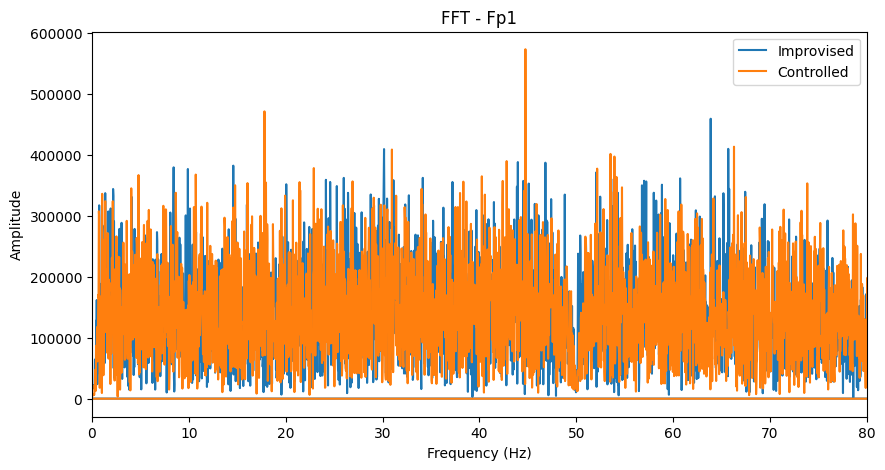

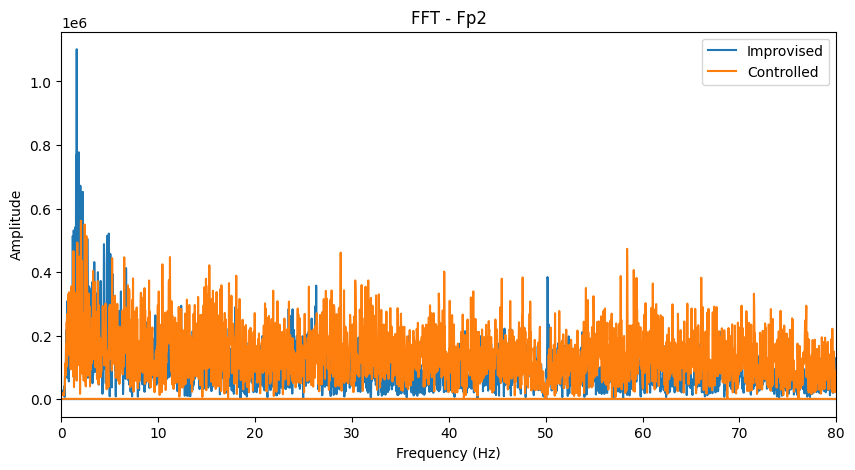

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for the improvised and controlled data
improvised_range_start = 66560
improvised_range_end = 74752
controlled_range_start = 75776
controlled_range_end = 83968

# Apply the FFT to the Fp1 channel data in the improvised and controlled data
fft_improvised_fp1 = np.fft.fft(filtered_data[0][improvised_range_start:improvised_range_end])
fft_controlled_fp1 = np.fft.fft(filtered_data[0][controlled_range_start:controlled_range_end])

# Apply the FFT to the Fp2 channel data in the improvised and controlled data
fft_improvised_fp2 = np.fft.fft(filtered_data[9][improvised_range_start:improvised_range_end])
fft_controlled_fp2 = np.fft.fft(filtered_data[9][controlled_range_start:controlled_range_end])

# Calculate the frequency values for the FFT
freq = np.fft.fftfreq(improvised_range_end - improvised_range_start, 1/sample_rates[0])

# Plot the FFT for the Fp1 channel in the improvised and controlled data
plt.figure(figsize=(10, 5))
plt.plot(freq, np.abs(fft_improvised_fp1), label='Improvised')
plt.plot(freq, np.abs(fft_controlled_fp1), label='Controlled')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT - Fp1')
plt.xlim(0, 80)
plt.legend()
plt.show()

# Plot the FFT for the Fp2 channel in the improvised and controlled data
plt.figure(figsize=(10, 5))
plt.plot(freq, np.abs(fft_improvised_fp2), label='Improvised')
plt.plot(freq, np.abs(fft_controlled_fp2), label='Controlled')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT - Fp2')
plt.xlim(0, 80)
plt.legend()
plt.show()
